<i>## Comments will be provided using this format. Key takeaway: groups are encouraged to change the formatting, but not the structure. Groups are also allowed to create additional notebooks - for instance, create one notebook for data exploration, and one notebook for each preprocessing-modelling-evaluation pipeline -, but must strive to keep an unified style across notebooks.</i>

#### NOVA IMS / BSc in Data Science / Text Mining 2024/2025
### <b>Group Project: "Solving the Hyderabadi Word Soup"</b>
#### Notebook `Notebook Title`

#### Group:
- `Group member #1`
- `(...)`
- `Group member #5`

#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Data Understanding](#P1)
- [2. General Data Preparation](#P2) 
- [3. Multilabel Classification (Information Requirement 3311)](#P3)
    - [3.1 Specific Data Preparation](#P31)
    - [3.2 Model Implementation](#P32)
    - [3.3 Model Evaluation](#P3n)
- [4. Sentiment Analysis (Information Requirement 3312)](#P4)
    - [4.1 Specific Data Preparation](#P41)
    - [4.2 Model Implementation](#P42)
    - [4.3 Model Evaluation](#P43)
- [...]
- [N. Additional Tasks (Information Requirements 332n)](#Pn)
    - [N.1 Specific Data Preparation](#Pn1)
    - [N.2 Model Implementation](#Pn2)
    - [N.3 Model Evaluation](#Pn3)

<i>## Note that the notebook structure differs from the report: instead of following the CRISP-DM phases and then specifying the different problems inside the phases, the notebook is structured by problem, with the CRISP-DM phases being defined for each specific problem.

In [42]:
## All imports must be concentrated on a cell that immediately follow the table of contents
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils import *

#without truncation
pd.set_option('display.max_colwidth', None)

In [40]:
%reload_ext autoreload
%autoreload 2

<font color='#BFD72F' size=5>1. Data Understanding</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

<i>## Imports.</i>

In [12]:
reviews=pd.read_csv('data/reviews_initial_preproc.csv')
restaurants=pd.read_csv('data/restaurants_initial_preproc.csv') 
restaurants['Collections'].fillna('[]', inplace=True)
restaurants['Collections'] = restaurants['Collections'].apply(lambda x: eval(x))
restaurants['Cuisines'] = restaurants['Cuisines'].apply(lambda x: eval(x))

## Restaurant data exploration


In [13]:
restaurants.head()

,Name,Cost,Collections,Cuisines,N_collections,open time,closing time
0,Beyond Flavours,800,"[Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings]","[Chinese, Continental, Kebab, European, South Indian, North Indian]",6,12,23
1,Paradise,800,[Hyderabad's Hottest],"[Biryani, North Indian, Chinese]",1,11,23
2,Flechazo,1300,"[Great Buffets, Hyderabad's Hottest]","[Asian, Mediterranean, North Indian, Desserts]",2,11,23
3,Shah Ghouse Hotel & Restaurant,800,[Late Night Restaurants],"[Biryani, North Indian, Chinese, Seafood, Beverages]",1,12,2
4,Over The Moon Brew Company,1200,"[Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest]","[Asian, Continental, North Indian, Chinese, Mediterranean]",5,12,24


In [14]:
restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           105 non-null    object
 1   Cost           105 non-null    int64 
 2   Collections    105 non-null    object
 3   Cuisines       105 non-null    object
 4   N_collections  105 non-null    int64 
 5   open time      105 non-null    int64 
 6   closing time   105 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.9+ KB


In [15]:
restaurants.describe()

,Cost,N_collections,open time,closing time
count,105.000000,105.000000,105.000000,105.000000
mean,861.428571,1.009524,11.028571,18.971429
std,510.149730,1.451095,2.826581,8.471056
min,150.000000,0.000000,1.000000,1.000000
25%,500.000000,0.000000,11.000000,22.000000
50%,700.000000,0.000000,12.000000,23.000000
75%,1200.000000,1.000000,12.000000,23.000000
max,2800.000000,7.000000,24.000000,24.000000


In [16]:
#there is no restaunt duplicates
restaurants['Name'].nunique()

105

In [17]:
cuisines_exploded = restaurants['Cuisines'].explode().explode()
collections_exploded = restaurants['Collections'].explode().explode()

In [18]:
"""restaurant_agg = restaurants_exploded.groupby(['Cuisines', 'Collections']).agg(
    total_cost=('Cost', 'mean'), # Sum of 'Cost'
    count=('Cost', 'count')     # Count of restaurants
)

# Sort the result by 'total_cost' in descending order and get the top 10 rows
restaurant_agg.sort_values(by='total_cost', ascending=False).head(10)"""

"restaurant_agg = restaurants_exploded.groupby(['Cuisines', 'Collections']).agg(\n    total_cost=('Cost', 'mean'), # Sum of 'Cost'\n    count=('Cost', 'count')     # Count of restaurants\n)\n\n# Sort the result by 'total_cost' in descending order and get the top 10 rows\nrestaurant_agg.sort_values(by='total_cost', ascending=False).head(10)"

In [19]:
"""restaurants_exploded.groupby(['Collections']).agg(
    mean_cost=('Cost', 'mean'),   # Calculate the mean of 'Cost'
    count=('Cost', 'count') ).sort_values(by='mean_cost', ascending=False).head(5)"""

"restaurants_exploded.groupby(['Collections']).agg(\n    mean_cost=('Cost', 'mean'),   # Calculate the mean of 'Cost'\n    count=('Cost', 'count') ).sort_values(by='mean_cost', ascending=False).head(5)"

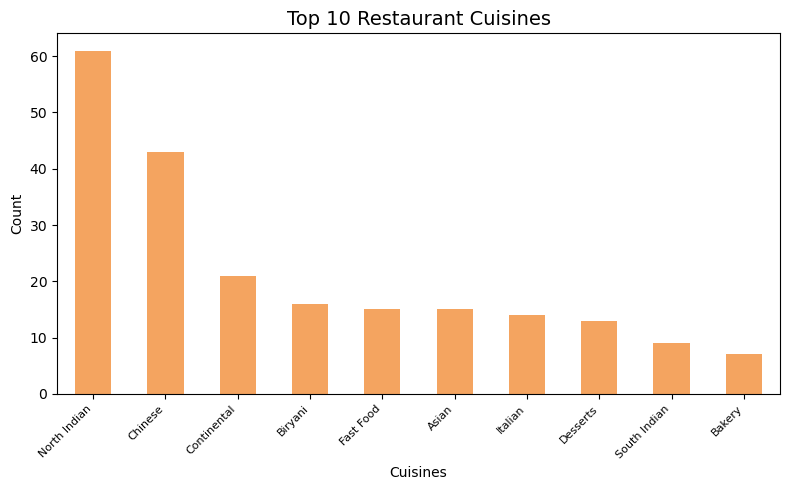

In [49]:
plot_top10_bar(cuisines_exploded)

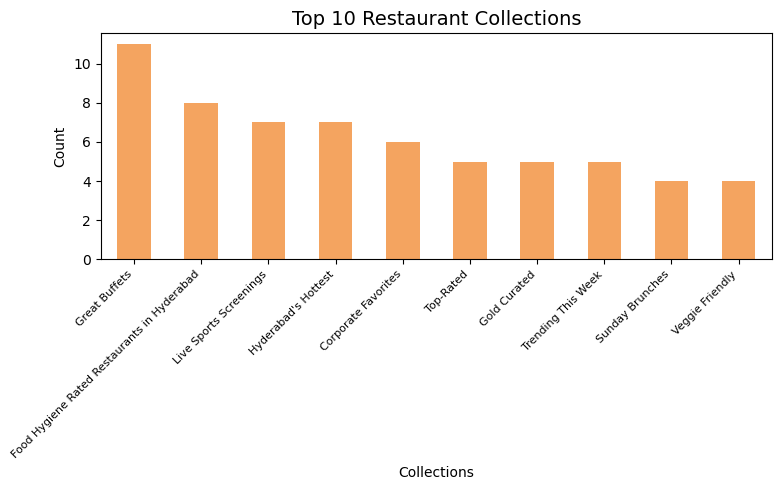

In [48]:
plot_top10_bar(collections_exploded)

## Reviews data exploration

In [22]:
reviews.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,N_reviews,Followers,Month,Year,Weekend,Post_Meal
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . had Saturday lunch , which was cost effective .\r\nGood place for a sate brunch. One can also chill with friends and or parents.\r\nWaiter Soumen Das was really courteous and helpful.",5.0,2019-05-25 15:54:00,0,1.0,2.0,5,2019,1,1
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. Service is very prompt. Food is good. Over all a good experience. Soumen Das - kudos to the service,5.0,2019-05-25 14:20:00,0,3.0,2.0,5,2019,1,1
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx for the service by Pradeep and Subroto. My personal recommendation is Penne Alfredo Pasta:) ....... Also the music in the background is amazing.,5.0,2019-05-24 22:54:00,0,2.0,3.0,5,2019,0,1
3,Beyond Flavours,Swapnil Sarkar,"Soumen das and Arun was a great guy. Only because of their behavior and sincerety, And good food off course, I would like to visit this place again.",5.0,2019-05-24 22:11:00,0,1.0,1.0,5,2019,0,1
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and basket mutton biryani. All are good. Thanks to Pradeep. He served well. We enjoyed here. Ambience is also very good.,5.0,2019-05-24 21:37:00,0,3.0,2.0,5,2019,0,1


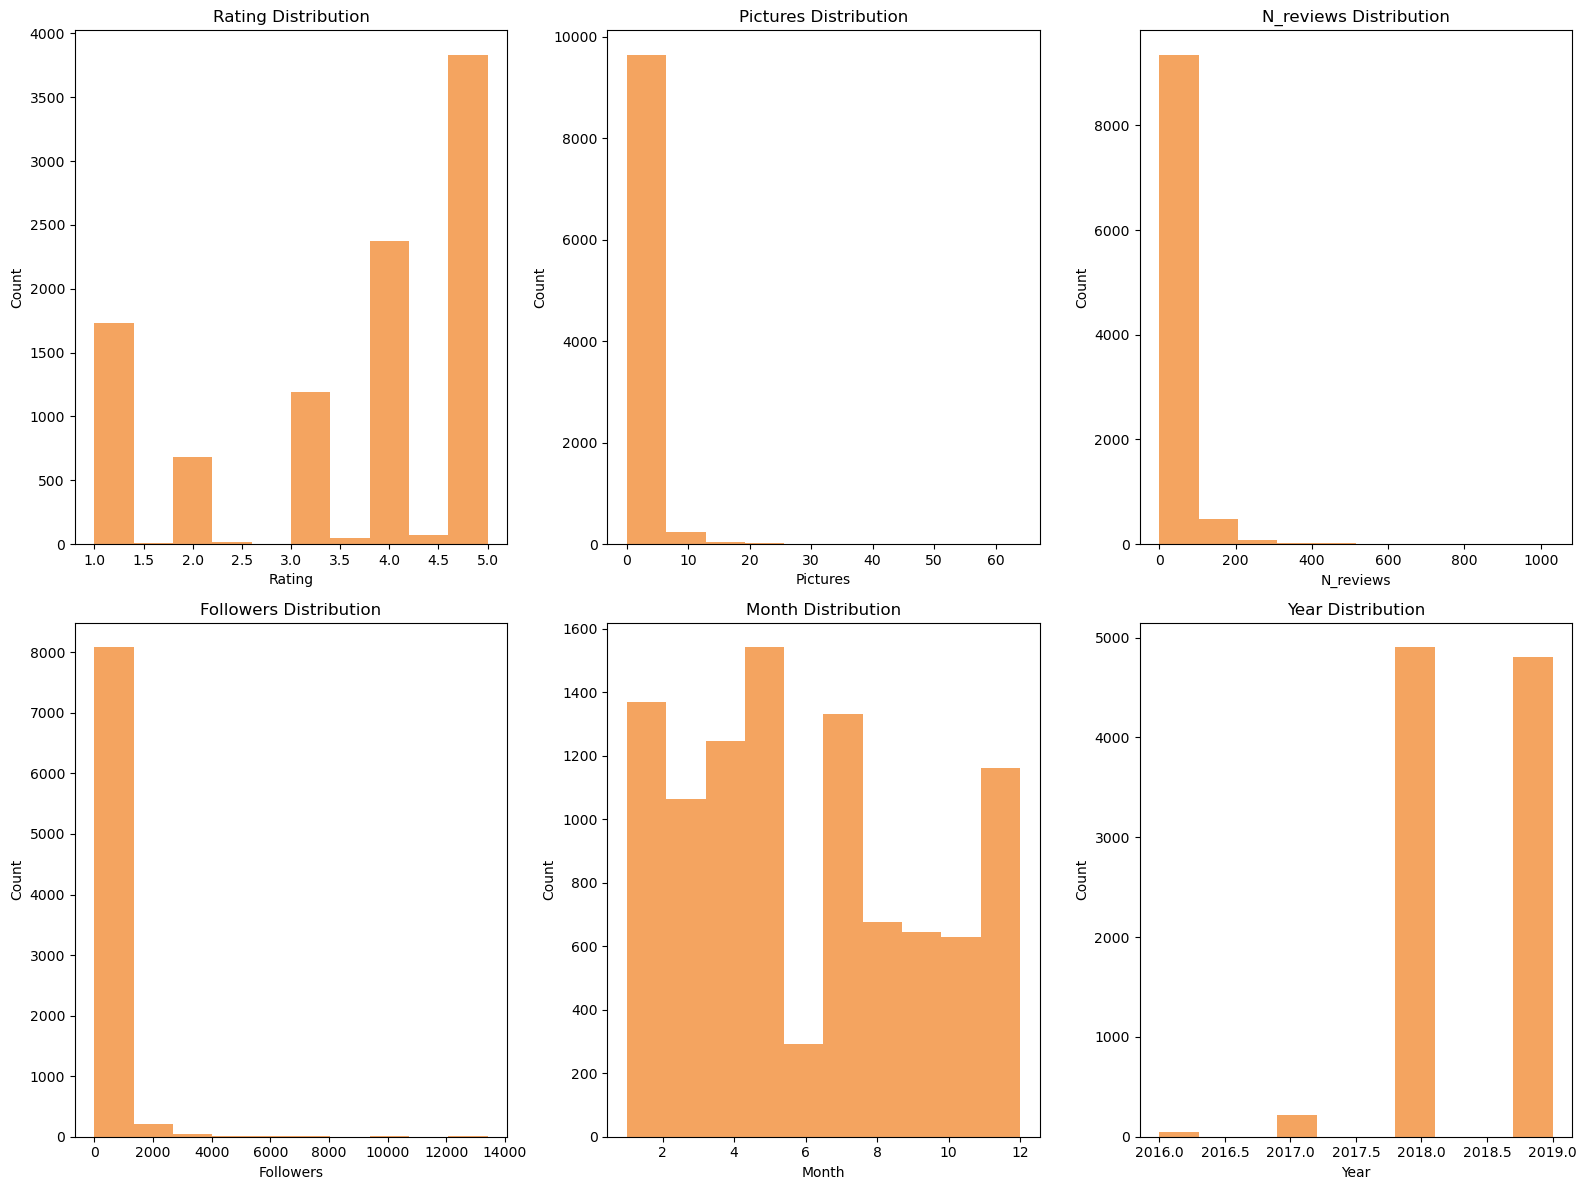

In [32]:
plot_histograms(reviews, ['Rating','Pictures','N_reviews','Followers','Month','Year'])

In [19]:
np.max(reviews['Followers'])

13410.0

In [20]:
reviews[reviews['Followers'] == 13410]

,Restaurant,Reviewer,Review,Rating,Time,Pictures,N_reviews,Followers,Month,Year,Weekend,Post_Meal
3927,Deli 9 Bistro,Satwinder Singh,"Nice ambience, wonderful service but not so wonderful food.\r\nOrdered the Thai green curry, was just a watery mess, probably the worst ever had.\r\nKung Pao chicken was overly sweet, the noodles were just tossed around in a few eggs and probably 2 pieces of chicken.\r\nThe rice was very dry giving us an overall average experience.",2.0,2019-02-10 12:46:00,4,186.0,13410.0,2,2019,1,0
6592,Komatose - Holiday Inn Express & Suites,Satwinder Singh,"Well next to Jonathans Kitchen is this place to down a few.\r\nKomatose is a good crowd puller, with plenty of weekend party groups and people from nearby IT companies.\r\nThe team at the bar does a phenomenon job. Their interaction with guests is over the top, no wonder I heard of people visiting this place almost every day of the year.\r\n\r\nAlso, from my experience, this is one of those few places where the Sound Acoustics are so well designed that its loud yet comfortable. You will not come out with a sore throat.\r\n\r\nThe food comes from its sibling Jonathans Kitchen, so we know it can never go wrong. About the drinks, well what could go wrong with them ! ) and Oh ! did I mention the Cheese Chilli Toast.. Its Different.. Try it..\r\n\r\nThe outdoor cabanas can seat about 8 ~ 10 people each, wonderful for the evenings.\r\n\r\nGreat Music with shows on specific days of the week.\r\n\r\nDraft is served, but tends to vanish Quickly :) \r\n\r\nThis place is a full package.\r\n\r\nDrinks - Hic Hic\r\nFood - 5 / 5\r\nAmbiance - 4.5 / 5\r\nService - 5 / 5",5.0,2018-04-09 16:11:00,5,186.0,13410.0,4,2018,0,0
6876,The Tilt Bar Republic,Satwinder Singh,"Nice place this.\r\nExcellent choice in Beers, probably amongst the best in Hyderabad.\r\nSober ambiance and good music\r\nWonderful mix of crowd and some okay dishes served up.\r\n\r\nWe tried the Egg Manchuria was pretty unique and then it was the Spicy Fried Idli was off beat\r\nThe Chicken tikka was standard\r\n\r\nA little spicy on your pocket, but what the heck a few beers don’t harm..\r\n\r\nAlthough the service could have been a little more prompt.\r\n\r\nSee the TILT in the Beer ;) !!\r\n\r\nAmbiance : 3.5 / 5\r\nFood : 3 / 5\r\nBeer : 5 / 5\r\nService : 3.5 / 5",4.0,2018-11-15 11:54:00,3,186.0,13410.0,11,2018,0,0


Most reviewers dont have any followers, and the reviewer with most followers is Satwinder Singh, with 13410 followers.

In [13]:
print('How many times a reviewer posted')
reviews['Reviewer'].value_counts().sort_values(ascending=False)

How many times a reviewer posted


Parijat Ray              13
Ankita                   13
Kiran                    12
Vedant Killa             11
Jay Mehta                11
                         ..
Manish Singh              1
Kshitiz Goyal             1
Deepali K. Nagrani        1
Laxminarayana Amuraji     1
Bhargava Krishna          1
Name: Reviewer, Length: 7446, dtype: int64

In [14]:
print('How many reviews each restaurant has')
reviews['Restaurant'].value_counts().sort_values(ascending=True)

How many reviews each restaurant has


American Wild Wings                 77
Arena Eleven                        85
Behrouz Biryani                    100
Over The Moon Brew Company         100
The Fisherman's Wharf              100
                                  ... 
Zega - Sheraton Hyderabad Hotel    100
Triptify                           100
Royal Spicy Restaurant             100
Faasos                             100
Gal Punjab Di                      100
Name: Restaurant, Length: 100, dtype: int64

<Axes: >

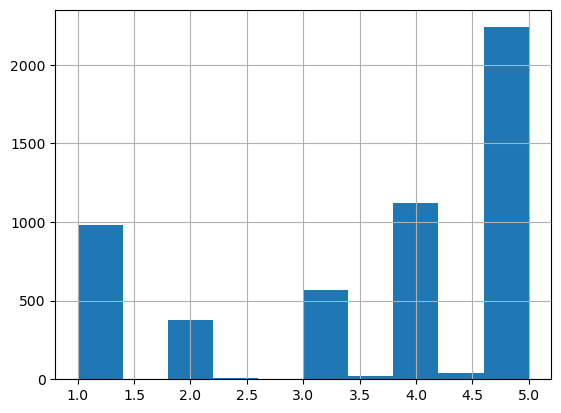

In [15]:
reviews[reviews['Post_Meal'] == 1]['Rating'].hist()

Das pessoas que enviaram review logo a seguir a refeição, maioria atribuiu rating the 5 (very good, very nice)

In [16]:
reviews.groupby('Restaurant').mean()

C:\Users\Marta\AppData\Local\Temp\ipykernel_6464\1368241081.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  reviews.groupby('Restaurant').mean()


,Rating,Pictures,N_reviews,Followers,Month,Year,Weekend,Post_Meal
Restaurant,,,,,,,,
10 Downing Street,3.80,1.05,39.90,261.414894,5.60,2018.67,0.40,0.44
13 Dhaba,3.48,0.41,17.70,114.280000,6.82,2018.39,0.49,0.60
"3B's - Buddies, Bar & Barbecue",4.76,0.13,3.70,17.278351,4.68,2019.00,0.31,0.81
AB's - Absolute Barbecues,4.88,0.24,2.71,10.600000,5.00,2019.00,0.47,0.85
Absolute Sizzlers,3.62,0.45,11.67,225.369863,3.62,2019.00,0.34,0.53
...,...,...,...,...,...,...,...,...
Urban Asia - Kitchen & Bar,3.65,1.78,39.34,209.021739,6.79,2018.44,0.28,0.55
Yum Yum Tree - The Arabian Food Court,3.56,1.29,19.84,131.845238,6.88,2018.30,0.40,0.45
Zega - Sheraton Hyderabad Hotel,4.45,0.83,27.38,351.841463,6.57,2018.22,0.23,0.45


See if a reviewer has given more than one review to the same restaurant.

In [33]:
review_counts = reviews.groupby(['Reviewer', 'Restaurant']).size().reset_index(name='review_count')

# Filter where review_count is greater than 1
multiple_reviews = review_counts[review_counts['review_count'] > 1]
#multiple_reviews_details = pd.merge(reviews, multiple_reviews, on=['Reviewer', 'Restaurant'])

multiple_reviews

,Reviewer,Restaurant,review_count
12,ABDUL MAJEED,Hyderabadi Daawat,3
170,Abhinav Sinha,Green Bawarchi Restaurant,2
226,Abhishek Pradhan,GD's,2
352,Afreen Jahan,eat.fit,6
420,Ajay Tanti,Green Bawarchi Restaurant,2
...,...,...,...
9321,Venkat,Hotel Zara Hi-Fi,3
9422,Vignesh,Green Bawarchi Restaurant,2
9719,Yasaswi Kaza,Triptify,2
9738,Yashasvi Rao,Sardarji's Chaats & More,2
